In [1]:
# ライブラリのインポート
from __future__ import print_function
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss      
from sklearn.metrics import roc_auc_score
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#CSVファイルの読み込み
test = pd.read_csv("9_3cont_basedow.csv",sep=",",header=0)

In [2]:
test.head()

,number,group,Age,SEX,function of thyroid,TG/TPOAb,TRAb,time,Q1,Q2,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1,0,70,0,0.0,0,NaN,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,20,1,0.0,0,NaN,200.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,40,1,0.0,0,NaN,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,40,1,0.0,0,NaN,200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,1,0.0,0,NaN,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
#欠損データを埋める(TRAbは0,timeは中央値)

test["TRAb"] = test["TRAb"].fillna(0)
test["time"] = test["time"].fillna(test["time"].median())

#DataFrameへの格納
df = pd.DataFrame(test)

#説明変数
x = df.drop(["group","number","function of thyroid","TG/TPOAb","TRAb","Q56"],axis=1).values

# 目的変数
y = df['group'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.05, random_state=2)


In [5]:
#欠損を埋めることができたか確認
test.head()

,number,group,Age,SEX,function of thyroid,TG/TPOAb,TRAb,time,Q1,Q2,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1,0,70,0,0.0,0,0.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,20,1,0.0,0,0.0,200.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,40,1,0.0,0,0.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,40,1,0.0,0,0.0,200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,1,0.0,0,0.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 3,max_features=10)
clf = clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
sum(predicted == y_test)/len(y_test)

0.75

In [14]:
tree.export_graphviz(clf, out_file="cont_basedow.dot",
                     filled=True,rounded=True)

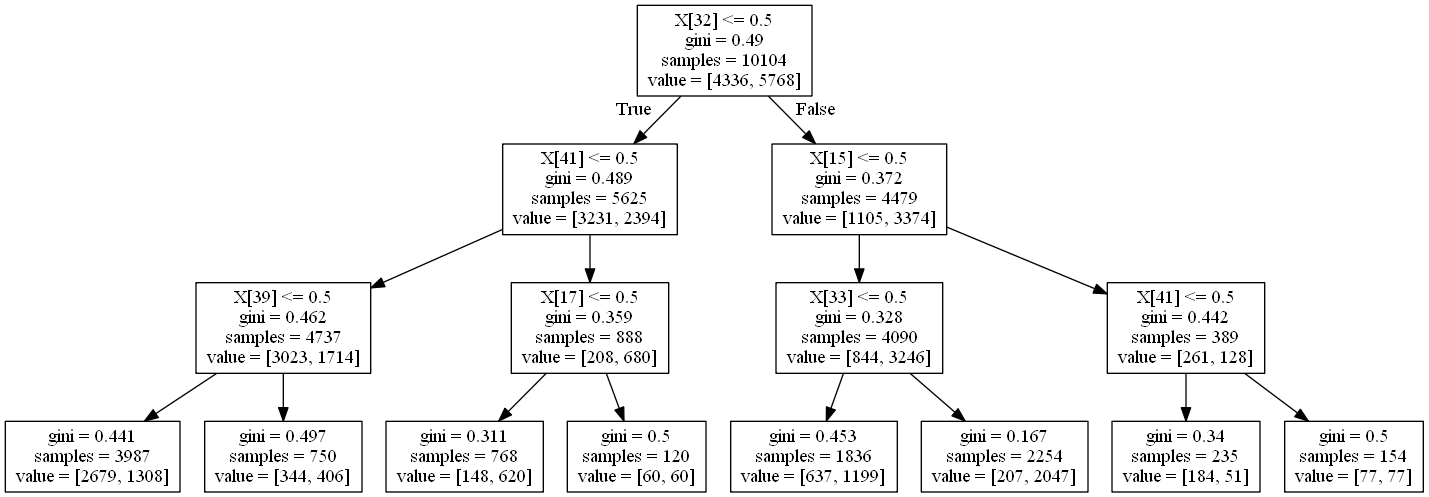

In [19]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())